<a href="https://colab.research.google.com/github/Arminsbss/tumor-classification/blob/main/tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import vgg16

In [ ]:
img = image.load_img("N (1).jpg")

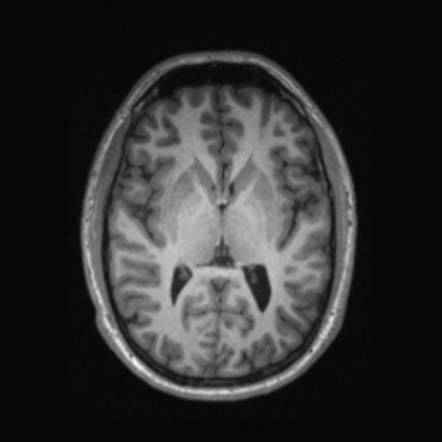

In [ ]:
display(img)

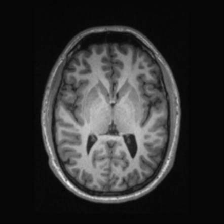

In [ ]:
img = image.load_img("N (1).jpg", target_size=(224, 224))
display(img)

In [ ]:
from tensorflow.tools.docs.doc_controls import T
from numpy.lib.function_base import append
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
tumor_no=[]
tumor_yes=[]
target=[]
for i in range(97):
  img = image.load_img("N ("+str(i+1)+").jpg")
  img = image.load_img("N ("+str(i+1)+").jpg", target_size=(224, 224))
  img = img_to_array(img)
  # prepare the image for the VGG model
  img = preprocess_input(img)
  tumor_no.append(img)
  target.append(0)
for i in range(155):
  img = image.load_img("Y ("+str(i+1)+").jpg")
  img = image.load_img("Y ("+str(i+1)+").jpg", target_size=(224, 224))
  img = img_to_array(img)
  # prepare the image for the VGG model
  img = preprocess_input(img)
  tumor_yes.append(img)
  target.append(1)
All_data=[]
All_data=tumor_no+tumor_yes
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(tumor_no))
print(len(tumor_yes))
print(All_data[0])

In [ ]:
All_data1=np.array(All_data)
target1=np.array(target)
randomize = np.arange(len(target1))
np.random.shuffle(randomize)
All_data1 = All_data1[randomize]
target1 = target1[randomize]

In [ ]:
#split train and test
train = All_data1[:-24]
test = All_data1[-24:]
train_lable = target1[:-24]
test_lable = target1[-24:]

In [ ]:
# for i in range(252):
#   All_data.insert(i,target[i])
# print(All_data[0])

0


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
modelVGG = VGG16(include_top=False, input_shape=(224, 224, 3))
modelVGG.layers.pop()
model = Sequential()
for layer in modelVGG.layers:
    model.add(layer)
model.add(keras.layers.AveragePooling2D(pool_size=(7, 7), padding="valid"))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

In [ ]:
train_lable=train_lable.reshape(228,1, 1, 1)

In [ ]:
# model.fit({"inputs": train, "targets": train_lable}, epochs=10, validation_data=({'input': test, 'targets': test_lable}))
model.fit(x=train, y=train_lable, epochs=10)

Epoch 1/10
1/8 [==>...........................] - ETA: 9:07 - loss: 0.0000e+00 - accuracy: 0.6875

KeyboardInterrupt: ignored

In [ ]:
# img.reshape(1,224,224,3)
arr = np.array(img)
model.predict(arr.reshape(1,224,224,3))
# model.fit(x=img,y=0,)

array([[[[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [  0.        ,  12.807448  ,   6.8690486 , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.78273344, ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            5.33057   ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [ 16.792358  ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [ 56.25915   ,   0.        ,  11.3974495 , ...,   0.        ,
            0.        ,   9.32915